In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import** **Libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import glob
import matplotlib.pyplot as plt

In [ ]:
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# My data is in google drive.
train_dir ="/content/drive/MyDrive/newdata/train"
test_dir="/content/drive/MyDrive/data/test"

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
def get_images(directory):
  count = 0
  for root_dir, cur_dir, files in os.walk(directory):
      count += len(files)
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

hazardous =get_images("/content/drive/MyDrive/newdata/train/hazardous")
general =get_images("/content/drive/MyDrive/newdata/train/general")
infectious =get_images("/content/drive/MyDrive/newdata/train/infectious")
radioactive =get_images("/content/drive/MyDrive/newdata/train/radioactive")
print("Class - General    :",general)
print("Class - Hazardous  :",hazardous)
print("Class - Infectious :",infectious)
print("Class - Radioactive:",radioactive)

4 Classes
928 Train images
20 Test images
Class - General    : 147
Class - Hazardous  : 518
Class - Infectious : 158
Class - Radioactive: 105


In [ ]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 validation_split=0.2, # validation split 20%.
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator = test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size)

Found 928 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [ ]:
# The name of the 12 diseases.
train_generator.class_indices

{'general': 0, 'hazardous': 1, 'infectious': 2, 'radioactive': 3}

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


In [ ]:
# Take one image to visualize it's changes after every layer
from keras.utils import load_img, img_to_array
import numpy as np

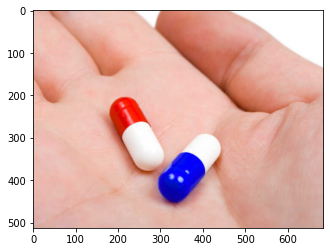

In [ ]:
img1 = load_img('/content/drive/MyDrive/newdata/train/hazardous/medical 1076.jpg')
plt.imshow(img1);

#preprocess image
img1 = load_img('/content/drive/MyDrive/newdata/train/hazardous/medical 1076.jpg', target_size=(256, 256))
img = img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
# Visualizing output after every layer.
from keras.models import Model

conv2d_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_features = conv2d_output.predict(img)
max_pooling2d_features = max_pooling2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 86ms/step


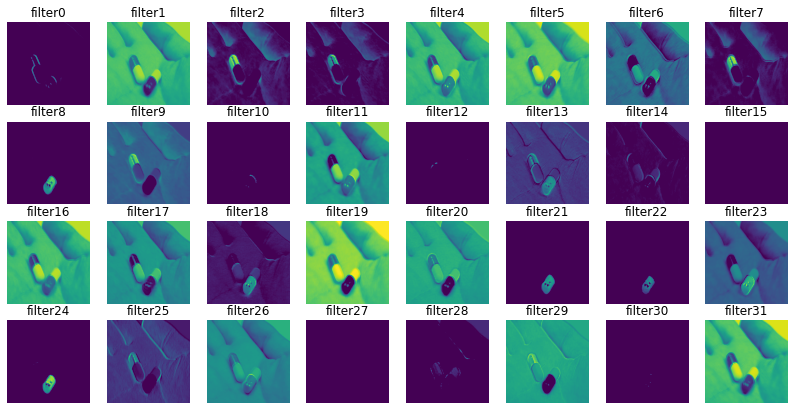

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

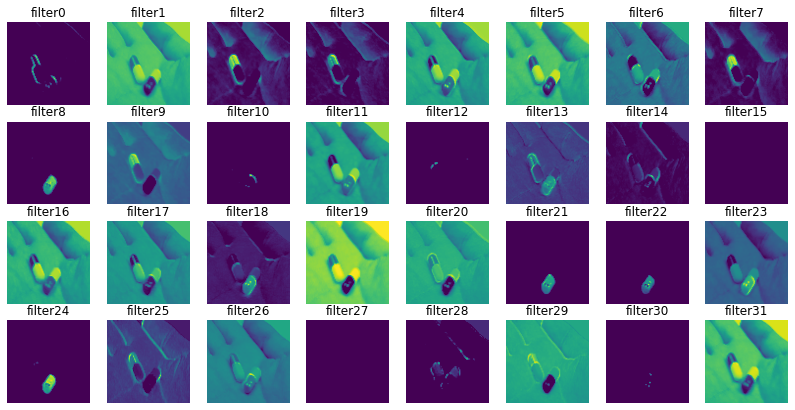

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_features[0, :, :, i], cmap='viridis')
plt.show()

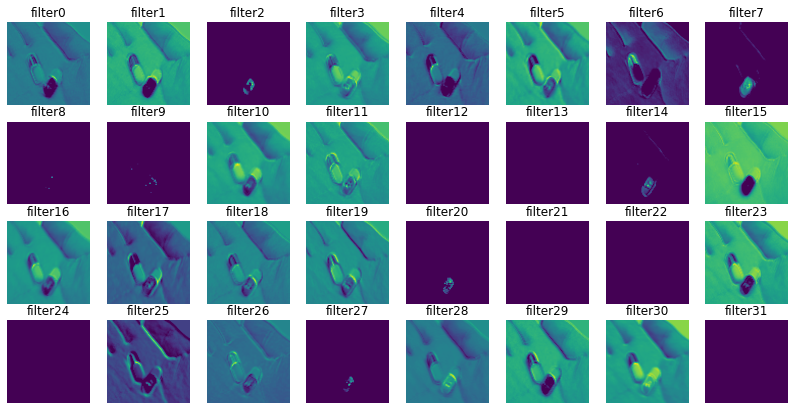

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

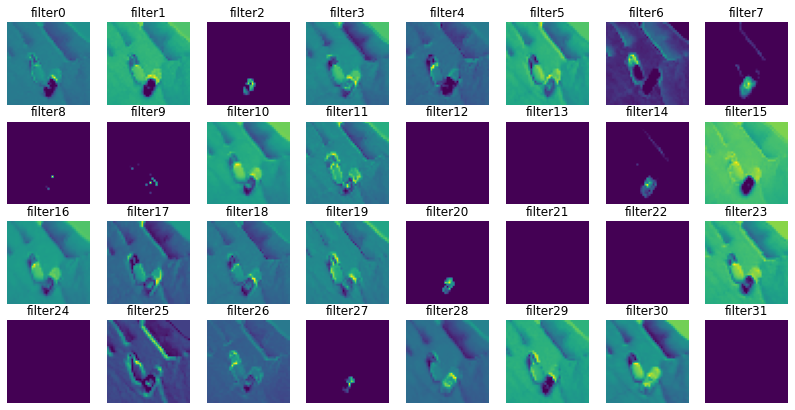

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

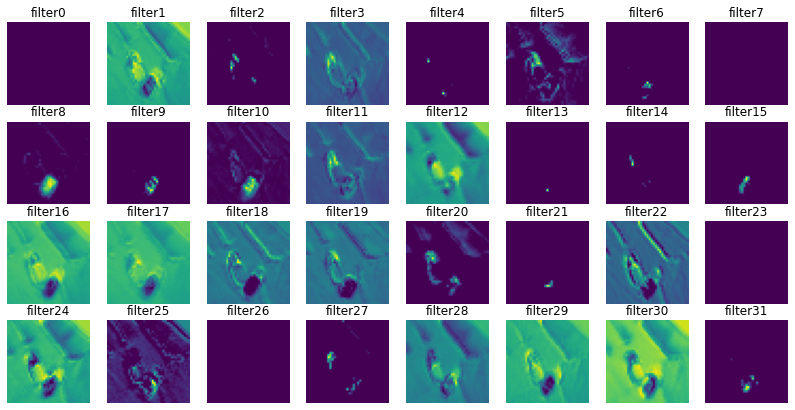

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

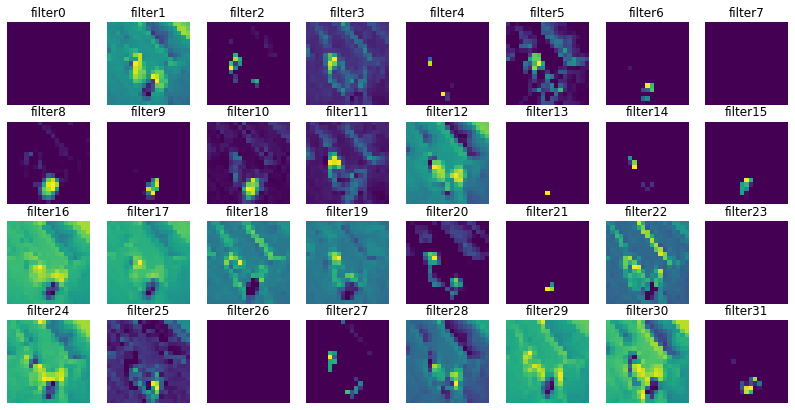

In [ ]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 928 images belonging to 4 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Models created/cnnmodel5.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto',period=1)


In [ ]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train=model.fit_generator(train_generator,
                          epochs = 10,
                          shuffle = True,
                          validation_data=validation_generator,
                          callbacks = [checkpoint]
                          )

Epoch 1/10
29/29 [==============================] - ETA: 0s - loss: 1.4200 - accuracy: 0.5334 

29/29 [==============================] - 408s 14s/step - loss: 1.4200 - accuracy: 0.5334 - val_loss: 1.0676 - val_accuracy: 0.5970
Epoch 2/10
29/29 [==============================] - ETA: 0s - loss: 0.9801 - accuracy: 0.6024

29/29 [==============================] - 147s 5s/step - loss: 0.9801 - accuracy: 0.6024 - val_loss: 0.8530 - val_accuracy: 0.6455
Epoch 3/10
29/29 [==============================] - ETA: 0s - loss: 0.8667 - accuracy: 0.6476

29/29 [==============================] - 142s 5s/step - loss: 0.8667 - accuracy: 0.6476 - val_loss: 0.7741 - val_accuracy: 0.6810
Epoch 4/10
29/29 [==============================] - ETA: 0s - loss: 0.8125 - accuracy: 0.6681

29/29 [==============================] - 142s 5s/step - loss: 0.8125 - accuracy: 0.6681 - val_loss: 0.7609 - val_accuracy: 0.6789
Epoch 5/10
29/29 [==============================] - ETA: 0s - loss: 0.7636 - accuracy: 0.6853

29/29 [==============================] - 148s 5s/step - loss: 0.7636 - accuracy: 0.6853 - val_loss: 0.7145 - val_accuracy: 0.7403
Epoch 6/10
29/29 [==============================] - ETA: 0s - loss: 0.7575 - accuracy: 0.7026

29/29 [==============================] - 147s 5s/step - loss: 0.7575 - accuracy: 0.7026 - val_loss: 0.7176 - val_accuracy: 0.7155
Epoch 7/10
29/29 [==============================] - ETA: 0s - loss: 0.7554 - accuracy: 0.6929

29/29 [==============================] - 147s 5s/step - loss: 0.7554 - accuracy: 0.6929 - val_loss: 0.7091 - val_accuracy: 0.7349
Epoch 8/10
29/29 [==============================] - ETA: 0s - loss: 0.6846 - accuracy: 0.7284

29/29 [==============================] - 146s 5s/step - loss: 0.6846 - accuracy: 0.7284 - val_loss: 0.6035 - val_accuracy: 0.7748
Epoch 9/10
29/29 [==============================] - ETA: 0s - loss: 0.6413 - accuracy: 0.7252

29/29 [==============================] - 147s 5s/step - loss: 0.6413 - accuracy: 0.7252 - val_loss: 0.7036 - val_accuracy: 0.6843
Epoch 10/10
29/29 [==============================] - ETA: 0s - loss: 0.6789 - accuracy: 0.7241

29/29 [==============================] - 143s 5s/step - loss: 0.6789 - accuracy: 0.7241 - val_loss: 0.5842 - val_accuracy: 0.7823


In [ ]:
Y_pred = model.predict(test_generator, test_generator.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)

1/1 [==============================] - 1s 812ms/step


In [ ]:
import sklearn.metrics as metrics
val_trues =test_generator.classes
from sklearn.metrics import classification_report
print(classification_report(val_trues, val_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.27      0.60      0.37         5
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         5

    accuracy                           0.20        20
   macro avg       0.15      0.20      0.16        20
weighted avg       0.15      0.20      0.16        20



In [ ]:
Y_pred = model.predict(test_generator, test_generator.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues =test_generator.classes
cm = metrics.confusion_matrix(val_trues, val_preds)
cm

1/1 [==============================] - 2s 2s/step


array([[0, 3, 1, 1],
       [0, 2, 1, 2],
       [0, 3, 1, 1],
       [0, 3, 0, 2]])

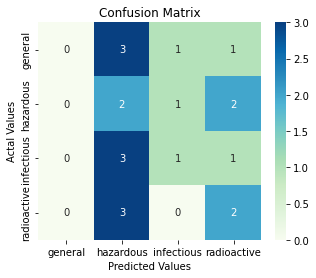

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
import seaborn as sns
import numpy as np
import pandas as pd
cm_df = pd.DataFrame(cm,
                     index = ["general","hazardous","infectious","radioactive"], 
                     columns = ["general","hazardous","infectious","radioactive"])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,cmap="GnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

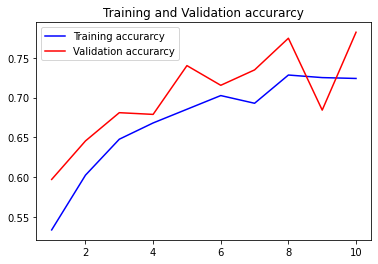

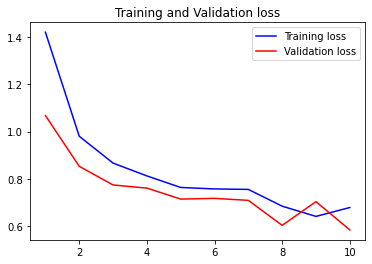

In [ ]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

1/1 [==============================] - 1s 1s/step - loss: 0.9272 - accuracy: 0.5000
Test score is 0.9271963238716125
Test accuracy is 0.5


1/1 [==============================] - 0s 118ms/step
[[0.09790095 0.8325661  0.06587118 0.00366181]]
[9, 83, 6, 0]
hazardous


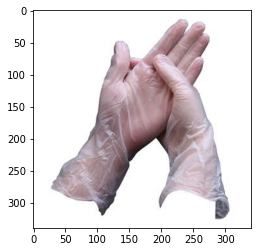

In [ ]:
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
    x = img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

def Predconvert(res):
  ans = list()
  for i in res:
    value = int(i*100)
    ans.append(value)
  return ans

Class = ["general","hazardous","infectious","radioactive"]
result = model.predict(prepare('/content/drive/MyDrive/data/test/infectious/medical 191.jpg'))
waste=load_img('/content/drive/MyDrive/data/test/infectious/medical 191.jpg')
plt.imshow(waste)
x = np.round(result).astype(int)
print(result)
final = Predconvert(result[0])
print(final)
max_value = max(final)
max_index = final.index(max_value)
print(Class[max_index])


1/1 [==============================] - 0s 45ms/step
[[0.02629906 0.21508013 0.01501948 0.7436014 ]]
[2, 21, 1, 74]
radioactive


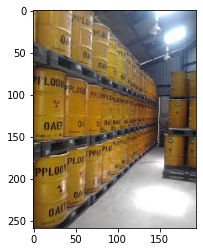

In [ ]:
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
    x = img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

def Predconvert(res):
  ans = list()
  for i in res:
    value = int(i*100)
    ans.append(value)
  return ans

Class = ["general","hazardous","infectious","radioactive"]
result = model.predict(prepare('/content/drive/MyDrive/data/train/radioactive/Copy of f.jpeg'))
waste=load_img('/content/drive/MyDrive/data/train/radioactive/Copy of f.jpeg')
plt.imshow(waste)
x = np.round(result).astype(int)
print(result)
final = Predconvert(result[0])
print(final)
max_value = max(final)
max_index = final.index(max_value)
print(Class[max_index])


1/1 [==============================] - 0s 53ms/step
[[0.0026601  0.17997333 0.81649125 0.00087536]]
[0, 17, 81, 0]
infectious


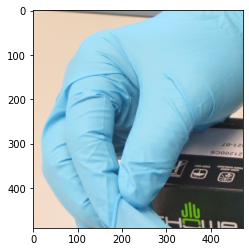

In [ ]:
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
    x = img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

def Predconvert(res):
  ans = list()
  for i in res:
    value = int(i*100)
    ans.append(value)
  return ans

Class = ["general","hazardous","infectious","radioactive"]
result = model.predict(prepare('/content/drive/MyDrive/data/test/infectious/medical 204.jpg'))
waste=load_img('/content/drive/MyDrive/data/test/infectious/medical 204.jpg')
plt.imshow(waste)
x = np.round(result).astype(int)
print(result)
final = Predconvert(result[0])
print(final)
max_value = max(final)
max_index = final.index(max_value)
print(Class[max_index])


In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('/content/drive/MyDrive/Models created/cnnmodel2.h5')

NameError: ignored

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices
classes

{'general': 0, 'hazardous': 1, 'infectious': 2, 'radioactive': 3}

# **Load the model for testing**

In [ ]:
from keras.models import load_model
model2=load_model('/content/drive/MyDrive/Models created/cnnmodel2.h5')

Classes = ["general","hazardous","infectious","radioactive"]


In [ ]:
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(256, 256))
    x = img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)

def Predconvert(res):
  ans = list()
  for i in res:
    value = int(i*100)
    ans.append(value)
  return ans

1/1 [==============================] - 0s 466ms/step
[[0.09517683 0.24630843 0.09436521 0.56414944]]
[9, 24, 9, 56]
radioactive


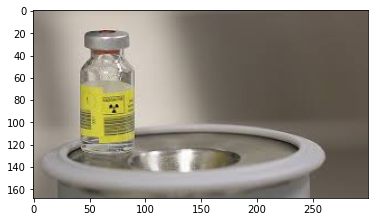

In [ ]:

result = model2.predict(prepare('/content/drive/MyDrive/newdata/train/radioactive/Copy of images (15).jpeg'))
waste=load_img('/content/drive/MyDrive/newdata/train/radioactive/Copy of images (15).jpeg')
plt.imshow(waste)
x = np.round(result).astype(int)
print(result)
final = Predconvert(result[0])
print(final)
max_value = max(final)
max_index = final.index(max_value)
print(Classes[max_index])


1/1 [==============================] - 0s 49ms/step
[[0.0026601  0.17997333 0.81649125 0.00087536]]
[0, 17, 81, 0]
infectious


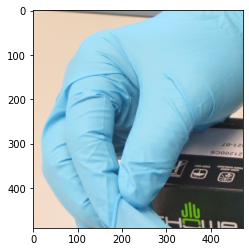

In [ ]:
result = model2.predict(prepare('/content/drive/MyDrive/data/test/infectious/medical 204.jpg'))
waste=load_img('/content/drive/MyDrive/data/test/infectious/medical 204.jpg')
plt.imshow(waste)
x = np.round(result).astype(int)
print(result)
final = Predconvert(result[0])
print(final)
max_value = max(final)
max_index = final.index(max_value)
print(Classes[max_index])


1/1 [==============================] - 0s 50ms/step
[[3.62369232e-04 1.04986824e-01 9.27206565e-05 8.94558012e-01]]
[0, 10, 0, 89]
radioactive


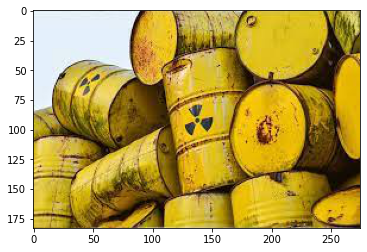

In [ ]:
result = model2.predict(prepare('/content/drive/MyDrive/data/test/radioactive/Copy of c.jpeg'))
waste=load_img('/content/drive/MyDrive/data/test/radioactive/Copy of c.jpeg')
plt.imshow(waste)
x = np.round(result).astype(int)
print(result)
final = Predconvert(result[0])
print(final)
max_value = max(final)
max_index = final.index(max_value)
print(Classes[max_index])